# Math 725

### Brent A. Thorne <brentathorne@gmail.com>

In class exercise detail.

## Ex 1.2 Midpoint Polygon Map

Suppose $V=(p_1,...,p_n)$, where $n$ is fixed.

$T:V\rightarrow V$

$(p_1,...,p_n) \xrightarrow{T} (\frac{p_1+p_2}{2},...,\frac{p_n+p_1}{2})$

In [95]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
from sympy import init_printing
init_printing() 

In [2]:
# fancy plot
def z_plot(Z, c=None):
    z= np.array(Z.tolist()).astype(np.complex64)
    n = len(z)
    plt.scatter(z.real, z.imag, c=c)
    for i in range(len(z)): # this got a bit fancy
        zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
        plt.text(zz.real, zz.imag, i, fontsize=12)
    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')

In [83]:
# midpoint transform
def T(n):
    m = [sym.Rational(1,2)]  + [0 for i in range(n-2)] + [sym.Rational(1,2)] 
    return Matrix([m[-i:] + m[:-i] for i in range(n)]) 
#display(Latex(f'$T\in C^3={sym.latex(T(3))}$, also $T^{-1}\in C^3={sym.latex(T(3).inv())}$'))

### Permutation Matrix

In [73]:
# do with symbols
n=5

V = Matrix(list(sym.symbols(f'z:{n}')))
lambda_i = list(sym.symbols(f'lambda_:{n}'))
M = sym.diag(lambda_i, unpack=True)
M, V, (M)*V  # there be our isomorpheus

⎛⎡λ₀  0   0   0   0 ⎤  ⎡z₀⎤  ⎡λ₀⋅z₀⎤⎞
⎜⎢                  ⎥  ⎢  ⎥  ⎢     ⎥⎟
⎜⎢0   λ₁  0   0   0 ⎥  ⎢z₁⎥  ⎢λ₁⋅z₁⎥⎟
⎜⎢                  ⎥  ⎢  ⎥  ⎢     ⎥⎟
⎜⎢0   0   λ₂  0   0 ⎥, ⎢z₂⎥, ⎢λ₂⋅z₂⎥⎟
⎜⎢                  ⎥  ⎢  ⎥  ⎢     ⎥⎟
⎜⎢0   0   0   λ₃  0 ⎥  ⎢z₃⎥  ⎢λ₃⋅z₃⎥⎟
⎜⎢                  ⎥  ⎢  ⎥  ⎢     ⎥⎟
⎝⎣0   0   0   0   λ₄⎦  ⎣z₄⎦  ⎣λ₄⋅z₄⎦⎠

In [90]:
# do it with numbers
z = sym.exp(-2 * sym.I * sym.pi/n)
V = Matrix([z**i for i in range(n)])
M = sym.diag([z**i for i in range(n)], unpack=True)
M,V

⎛⎡1     0         0        0       0   ⎤  ⎡   1    ⎤⎞
⎜⎢                                     ⎥  ⎢        ⎥⎟
⎜⎢    -2⋅ⅈ⋅π                           ⎥  ⎢ -2⋅ⅈ⋅π ⎥⎟
⎜⎢    ───────                          ⎥  ⎢ ───────⎥⎟
⎜⎢       5                             ⎥  ⎢    5   ⎥⎟
⎜⎢0  ℯ            0        0       0   ⎥  ⎢ℯ       ⎥⎟
⎜⎢                                     ⎥  ⎢        ⎥⎟
⎜⎢              -4⋅ⅈ⋅π                 ⎥  ⎢ -4⋅ⅈ⋅π ⎥⎟
⎜⎢              ───────                ⎥  ⎢ ───────⎥⎟
⎜⎢                 5                   ⎥  ⎢    5   ⎥⎟
⎜⎢0     0      ℯ           0       0   ⎥, ⎢ℯ       ⎥⎟
⎜⎢                                     ⎥  ⎢        ⎥⎟
⎜⎢                        4⋅ⅈ⋅π        ⎥  ⎢  4⋅ⅈ⋅π ⎥⎟
⎜⎢                        ─────        ⎥  ⎢  ───── ⎥⎟
⎜⎢                          5          ⎥  ⎢    5   ⎥⎟
⎜⎢0     0         0      ℯ         0   ⎥  ⎢ ℯ      ⎥⎟
⎜⎢                                     ⎥  ⎢        ⎥⎟
⎜⎢                                2⋅ⅈ⋅π⎥  ⎢  2⋅ⅈ⋅π ⎥⎟
⎜⎢                          

In [116]:
M.eigenvects(simplify=True) # no order to these since they are all same arg

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛             ⎡⎡0⎤⎤⎞  ⎛             ⎡⎡0⎤⎤⎞  ⎛           ⎡⎡0⎤⎤⎞
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜ -4⋅ⅈ⋅π      ⎢⎢ ⎥⎥⎟  ⎜ -2⋅ⅈ⋅π      ⎢⎢ ⎥⎥⎟  ⎜ 2⋅ⅈ⋅π     ⎢⎢ ⎥⎥⎟
⎢⎜      ⎢⎢0⎥⎥⎟  ⎜ ───────     ⎢⎢0⎥⎥⎟  ⎜ ───────     ⎢⎢1⎥⎥⎟  ⎜ ─────     ⎢⎢0⎥⎥⎟
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜    5        ⎢⎢ ⎥⎥⎟  ⎜    5        ⎢⎢ ⎥⎥⎟  ⎜   5       ⎢⎢ ⎥⎥⎟
⎢⎜1, 1, ⎢⎢0⎥⎥⎟, ⎜ℯ       , 1, ⎢⎢1⎥⎥⎟, ⎜ℯ       , 1, ⎢⎢0⎥⎥⎟, ⎜ℯ     , 1, ⎢⎢0⎥⎥⎟
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢ ⎥⎥⎟  ⎜           ⎢⎢ ⎥⎥⎟
⎢⎜      ⎢⎢0⎥⎥⎟  ⎜             ⎢⎢0⎥⎥⎟  ⎜             ⎢⎢0⎥⎥⎟  ⎜           ⎢⎢0⎥⎥⎟
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢ ⎥⎥⎟  ⎜             ⎢⎢ ⎥⎥⎟  ⎜           ⎢⎢ ⎥⎥⎟
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝             ⎣⎣0⎦⎦⎠  ⎝             ⎣⎣0⎦⎦⎠  ⎝           ⎣⎣1⎦⎦⎠

  ⎛           ⎡⎡0⎤⎤⎞⎤
  ⎜ 4⋅ⅈ⋅π     ⎢⎢ ⎥⎥⎟⎥
  ⎜ ─────     ⎢⎢0⎥⎥⎟⎥
  ⎜   5       ⎢⎢ ⎥⎥⎟⎥
, ⎜ℯ     , 1, ⎢⎢0⎥⎥⎟⎥
  ⎜           ⎢⎢ ⎥⎥⎟⎥
  ⎜           ⎢⎢1⎥⎥⎟⎥
  ⎜           ⎢⎢ ⎥⎥⎟⎥
  ⎝           ⎣⎣0⎦⎦⎠⎦

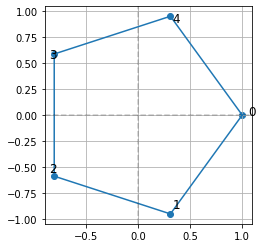

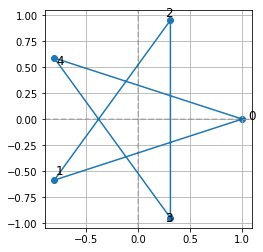

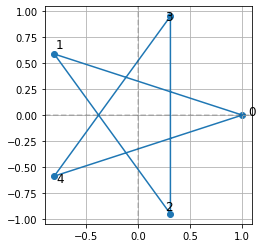

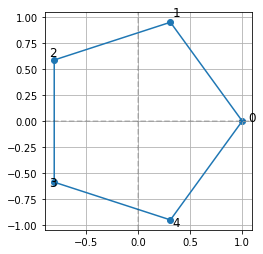

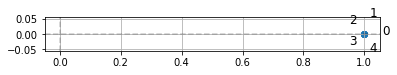

In [92]:
# Isomorpheus asks how deep down the rabbit hole do we want to go?
for i in range(n):
    z_plot((M**i)*V)
    plt.show()

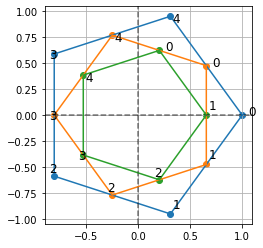

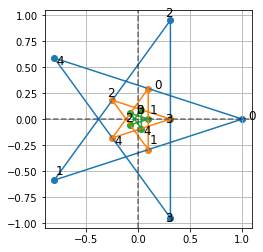

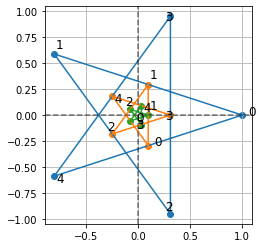

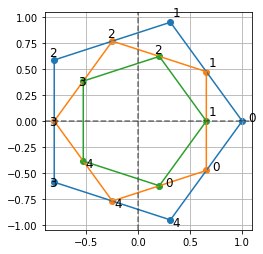

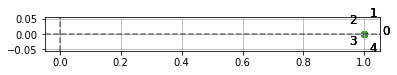

In [107]:
# now we can map any of these isomorphic subspaces to a midpoint basis
for j in range(n):
    for i in range(3):
        z_plot(T(n)**i * M**j * V)
    plt.show()

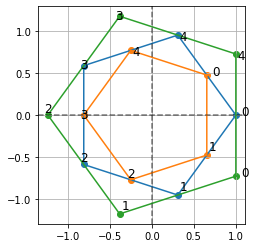

In [135]:
# now let's consider just one basis permutation
U = T(n) * V
W = T(n).inv() * V

#z_plot(M*V) # basis permutation
z_plot(V)
z_plot(U)
z_plot(W)